# Calculate zeros of the Airy function and its derivative

`scipy` has a built-in Airy function that also returns the derivative (`airy`). 

There are multiple root solving functions in `scipy`. The general multi-dimensional version is `root`.

In [1]:
import numpy as np
from scipy.special import airy
from scipy.optimize import root
import matplotlib.pyplot as plt


In [2]:
def Airy(x, index):
    """
    Airy function. Returns Ai, Ai', Bi, Bi according to index = 0,1,2,3'
    """
    ans = airy(x)
    return ans[index]

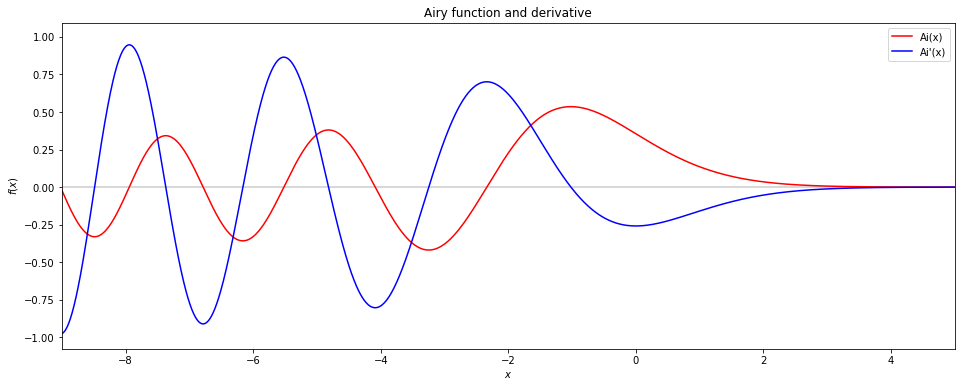

In [3]:
x_mesh = np.arange(-10,10,.01)

fig = plt.figure(figsize=(16,6))

ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel(r'$x$')
ax1.set_ylabel(r'$f(x)$')
ax1.set_xlim(-9., 5.)
#ax1.set_ylim(-1., 3)
ax1.axhline(0, color='gray', alpha=0.4)

ax1.plot(x_mesh, Airy(x_mesh, 0), color='red', label=r'Ai(x)')
ax1.plot(x_mesh, Airy(x_mesh, 1), color='blue', label=r"Ai'(x)")
ax1.set_title('Airy function and derivative')
ax1.legend();


In [4]:
kval = 1/2
const = (2*kval**2/2)**(1/3)

print("guess   Ai zero    odd energy     Ai' zero   even energy")
for x0 in range(0, -10, -1):
    ai_zero_sol = root(Airy, x0, args=0)
    ai_zero = ai_zero_sol.x[0]
    
    ai_prime_zero_sol = root(Airy, x0, args=1)
    ai_prime_zero = ai_prime_zero_sol.x[0]
    print(f' {x0: d}    {ai_zero:.5f}  {-ai_zero*const: .10f}     {ai_prime_zero:.5f}    {-ai_prime_zero*const: .10f}')

guess   Ai zero    odd energy     Ai' zero   even energy
  0    55.56872  -35.0060978271     0.00000    -0.0000000000
 -1    84.86775  -53.4633338893     -1.01879     0.6417993552
 -2    -2.33811   1.4729153717     -1.01879     0.6417993552
 -3    -2.33811   1.4729153717     -3.24820     2.0462362540
 -4    -4.08795   2.5752467778     -1.01879     0.6417993552
 -5    -5.52056   3.4777347673     -4.82010     3.0364722294
 -6    -5.52056   3.4777347673     -6.16331     3.8826403372
 -7    -6.78671   4.2753581911     -7.37218     4.6441806536
 -8    -7.94413   5.0044905648     -12.38479     7.8019277841
 -9    -9.02265   5.6839138680     55.75625    -35.1242352557


To do: step through and pick out unique energies and throw out negative results (false zeros).